#### 1. Import Necessary Libraries 

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression

#### Assignment 4

1) Delivery_time -> Predict delivery time using sorting time 
* Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

#### 2. Import data

In [64]:
delivery_data= pd.read_csv('delivery_time.csv')
delivery_data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


#### 3. Initital Analysis

In [65]:
delivery_data.shape

(21, 2)

In [66]:
delivery_data.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [67]:
delivery_data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

#### 4. Assumption check

#### 4.1 Check for Linearity

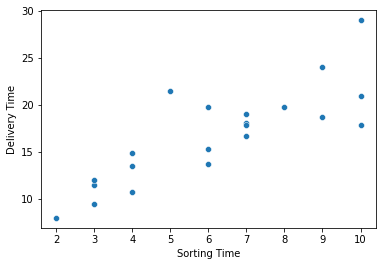

In [68]:
sns.scatterplot(x='Sorting Time', y='Delivery Time', data=delivery_data)
plt.show()

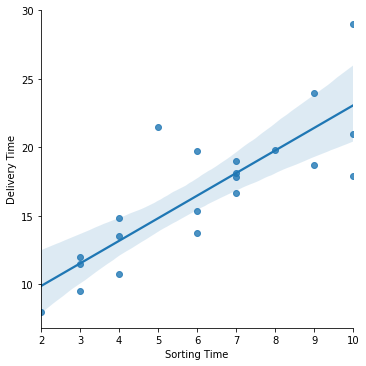

In [69]:
sns.lmplot(x='Sorting Time', y='Delivery Time', data=delivery_data)
plt.show()

###### As displayed in the scatter plot, the data does contains some outliers, but there is potive correlation between delivery time and sorting Time

In [70]:
delivery_data.corr().round(2)

,Delivery Time,Sorting Time
Delivery Time,1.00,0.83
Sorting Time,0.83,1.00


The correlation between delivery time and sorting Time is high (83%)

#### 4. Data Preparation & 5 . Model Building & Training

For linear regression, we use 2 libraries
1. statsmodels - ols technique (Ordinary Least Square tech nique)
2.sklearn - LinearRegression

In [71]:
import statsmodels.formula.api as smf

In [76]:
x=delivery_data['Sorting Time']
y=delivery_data['Delivery Time']
lin_reg_model = sm.OLS(y,x).fit()
lin_reg_model

#### 7. Model Testing

In [77]:
lin_reg_model.params

Sorting Time    2.565246
dtype: float64

In [78]:
lin_reg_model.tvalues , lin_reg_model.pvalues

(Sorting Time    20.603344
 dtype: float64,
 Sorting Time    6.118908e-15
 dtype: float64)

In [79]:
lin_reg_model.rsquared , lin_reg_model.rsquared_adj

(0.955005401256664, 0.9527556713194972)

#### 8 . Model Prediction

#### 8. 1 No transformation

In [82]:
predictions = lin_reg_model.predict(x)

In [83]:
lin_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              424.5
Date:                Fri, 03 Dec 2021   Prob (F-statistic):                    6.12e-15
Time:                        13:46:58   Log-Likelihood:                         -57.349
No. Observations:                  21   AIC:                                      116.7
Df Residuals:                      20   BIC:                                      117.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     2.5652      0.125     20.603      0.000       2.306       2.825
==============================================================================
Omnibus:                        1.504   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                0.508
Skew:                          -0.348   Prob(JB):                        0.776
Kurtosis:                       3.310   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 8.2 Log Transformation of X

In [87]:
x_logt = np.log(delivery_data['Sorting Time'])

In [90]:
lin_reg_model2 = sm.OLS(y,x_logt).fit()
predictions2= lin_reg_model2.predict(x_logt)

In [92]:
lin_reg_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              791.0
Date:                Fri, 03 Dec 2021   Prob (F-statistic):                    1.48e-17
Time:                        13:58:21   Log-Likelihood:                         -51.035
No. Observations:                  21   AIC:                                      104.1
Df Residuals:                      20   BIC:                                      105.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     9.6706      0.344     28.124      0.000       8.953      10.388
==============================================================================
Omnibus:                        3.656   Durbin-Watson:                   1.453
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.164
Skew:                           0.772   Prob(JB):                        0.339
Kurtosis:                       3.298   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 8.3 Log Transformation of Y

In [93]:
y_logt = np.log(delivery_data['Delivery Time'])

In [94]:
lin_reg_model3 = sm.OLS(y_logt,x).fit()
predictions3 = lin_reg_model3.predict(x)

In [96]:
lin_reg_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.917
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                              219.7
Date:                Fri, 03 Dec 2021   Prob (F-statistic):                    3.00e-12
Time:                        14:01:14   Log-Likelihood:                         -25.284
No. Observations:                  21   AIC:                                      52.57
Df Residuals:                      20   BIC:                                      53.61
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     0.4008      0.027     14.821      0.000       0.344       0.457
==============================================================================
Omnibus:                        2.572   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                1.346
Skew:                          -0.275   Prob(JB):                        0.510
Kurtosis:                       1.889   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 8.4 Log Transformation of x and y

In [110]:
lin_reg_model4 = sm.OLS(y_logt,x_logt).fit()
predictions4 = lin_reg_model4.predict(x_logt)

In [112]:
lin_reg_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              688.7
Date:                Fri, 03 Dec 2021   Prob (F-statistic):                    5.72e-17
Time:                        14:07:45   Log-Likelihood:                         -13.899
No. Observations:                  21   AIC:                                      29.80
Df Residuals:                      20   BIC:                                      30.84
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     1.5396      0.059     26.244      0.000       1.417       1.662
==============================================================================
Omnibus:                        1.636   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.137
Skew:                           0.304   Prob(JB):                        0.566
Kurtosis:                       2.035   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 8.5 Square root transformation of x

In [113]:
x_sqrt = np.sqrt(delivery_data['Sorting Time'])

In [114]:
lin_reg_model5 = sm.OLS(y,x_sqrt).fit()
predictions5 = lin_reg_model5.predict(x_sqrt)

In [117]:
lin_reg_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              772.0
Date:                Fri, 03 Dec 2021   Prob (F-statistic):                    1.88e-17
Time:                        14:07:57   Log-Likelihood:                         -51.284
No. Observations:                  21   AIC:                                      104.6
Df Residuals:                      20   BIC:                                      105.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     6.9466      0.250     27.785      0.000       6.425       7.468
==============================================================================
Omnibus:                        6.818   Durbin-Watson:                   1.334
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                4.599
Skew:                           1.090   Prob(JB):                        0.100
Kurtosis:                       3.708   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 8.6 Sqrt Transformation of Y

In [118]:
y_sqrt = np.sqrt(delivery_data['Delivery Time'])

In [119]:
lin_reg_model6 = sm.OLS(y_sqrt,x).fit()
predictions6 = lin_reg_model6.predict(x)

In [121]:
lin_reg_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                              266.0
Date:                Fri, 03 Dec 2021   Prob (F-statistic):                    5.09e-13
Time:                        14:09:56   Log-Likelihood:                         -31.484
No. Observations:                  21   AIC:                                      64.97
Df Residuals:                      20   BIC:                                      66.01
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     0.5926      0.036     16.309      0.000       0.517       0.668
==============================================================================
Omnibus:                        1.452   Durbin-Watson:                   1.434
Prob(Omnibus):                  0.484   Jarque-Bera (JB):                1.105
Skew:                          -0.328   Prob(JB):                        0.575
Kurtosis:                       2.087   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 8.7 Sqrt Transformation of x and y

In [122]:
lin_reg_model7 = sm.OLS(y_sqrt,x_sqrt).fit()
predictions7 = lin_reg_model7.predict(x_sqrt)

In [124]:
lin_reg_model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1542.
Date:                Fri, 03 Dec 2021   Prob (F-statistic):                    2.10e-20
Time:                        14:12:21   Log-Likelihood:                         -13.658
No. Observations:                  21   AIC:                                      29.32
Df Residuals:                      20   BIC:                                      30.36
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     1.6364      0.042     39.267      0.000       1.549       1.723
==============================================================================
Omnibus:                        0.176   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.916   Jarque-Bera (JB):                0.231
Skew:                          -0.179   Prob(JB):                        0.891
Kurtosis:                       2.632   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
lin_reg_model7.pvalues

Sorting Time    2.100766e-20
dtype: float64

We will use Model 7 as it has the best R square value  

1 - p-value < 0.01  
Thus the model is accepted

2 - coefficient == 1.64  
Thus if the value of Sorting Time is increased by 1, the predicted value of Delivery Time will increase by 1.64

3 - Adj. R-sqared == 0.987  
Thus the model explains 98.7% of the variance in dependent variable

### Predict for new sorting time say 3, 8

In [144]:
new_data= pd.Series([3,8])
new_data

0    3
1    8
dtype: int64

In [145]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,3
1,8


In [146]:
lin_reg_model7.predict(data_pred)

0     4.909060
1    13.090827
dtype: float64